<a href="https://colab.research.google.com/github/zhongyanmin/Gemini-API/blob/main/image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import base64
from IPython.display import display

In [ ]:
# %pip install -U -q 'google-genai>=1.0.0'

In [ ]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

A whimsical 3D rendering of a pink pig wearing a distinguished grey top hat and small, feathery white wings soaring through the air. Below, a brightly colored, clean futuristic city with sleek, rounded buildings interspersed with lush green parks and elevated walkways bustles with subtle activity under a clear sky.




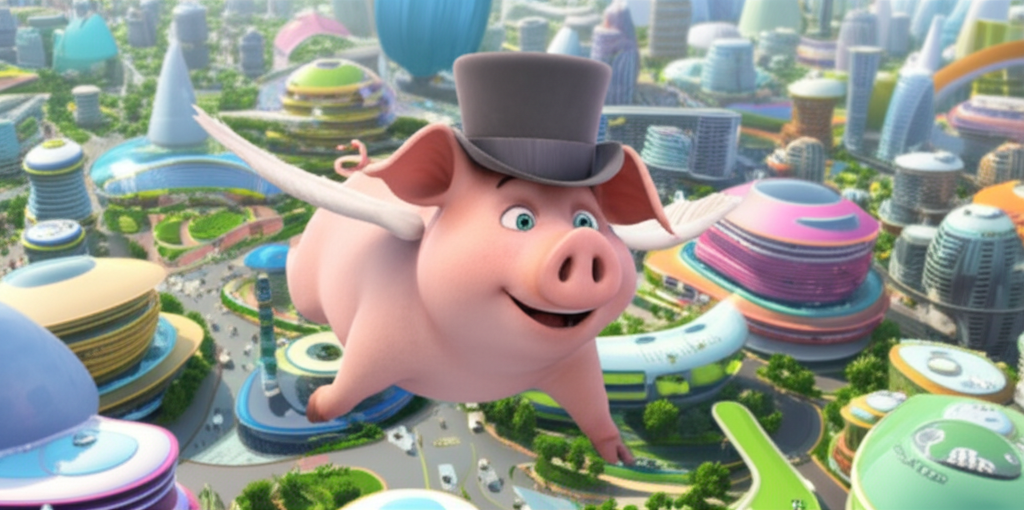

In [ ]:
client = genai.Client(api_key=GEMINI_API_KEY)

contents = ('Hi, can you create a 3d rendered image of a pig '
            'with wings and a top hat flying over a happy '
            'futuristic scifi city with lots of greenery?')

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=contents,
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO((part.inline_data.data)))
    image.save('gemini-native-image.png')
    # image.show()
    display(image)